In [1]:
#importing packages and libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#opening diffrent files and appending the data to the same dataframe

data = pd.read_csv("/Dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
print(data.shape)
d1 = pd.read_csv("/Dataset/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
print(d1.shape)
d2 = pd.read_csv("/Dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv")
print(d2.shape)
d3 = pd.read_csv("/Dataset/Monday-WorkingHours.pcap_ISCX.csv")
print(d3.shape)
d4 = pd.read_csv("/Dataset/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
print(d4.shape)
d5 = pd.read_csv("/Dataset/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
print(d5.shape)
d6 = pd.read_csv("/Dataset/Tuesday-WorkingHours.pcap_ISCX.csv")
print(d6.shape)
d7 = pd.read_csv("/Dataset/Wednesday-workingHours.pcap_ISCX.csv")
print(d7.shape)



/Users/rehan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(225745, 79)
(286467, 79)
(191033, 79)


/Users/rehan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(529918, 79)
(288602, 79)
(170366, 79)
(445909, 79)
(692703, 79)


In [3]:
#print(data.shape)

data = data.append(d1,ignore_index=True)
#print(data.shape)

data = data.append(d2,ignore_index=True)
#print(data.shape)

data = data.append(d3,ignore_index=True)
#print(data.shape)

data = data.append(d4,ignore_index=True)
#print(data.shape)

data = data.append(d5,ignore_index=True)
#print(data.shape)

data = data.append(d6,ignore_index=True)
#print(data.shape)

data = data.append(d7,ignore_index=True)
print(data.shape)


(2830743, 79)


In [4]:
#printing the shape and columns names of the data 

print(data.shape)
print(data.columns)

(2830743, 79)
Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Lengt

In [5]:
#encoding the labels using label encoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Flow Bytes/s'] = le.fit_transform(data['Flow Bytes/s'].astype(str))
data[' Label'] = le.fit_transform(data[' Label'].astype(str))

(78, 78)


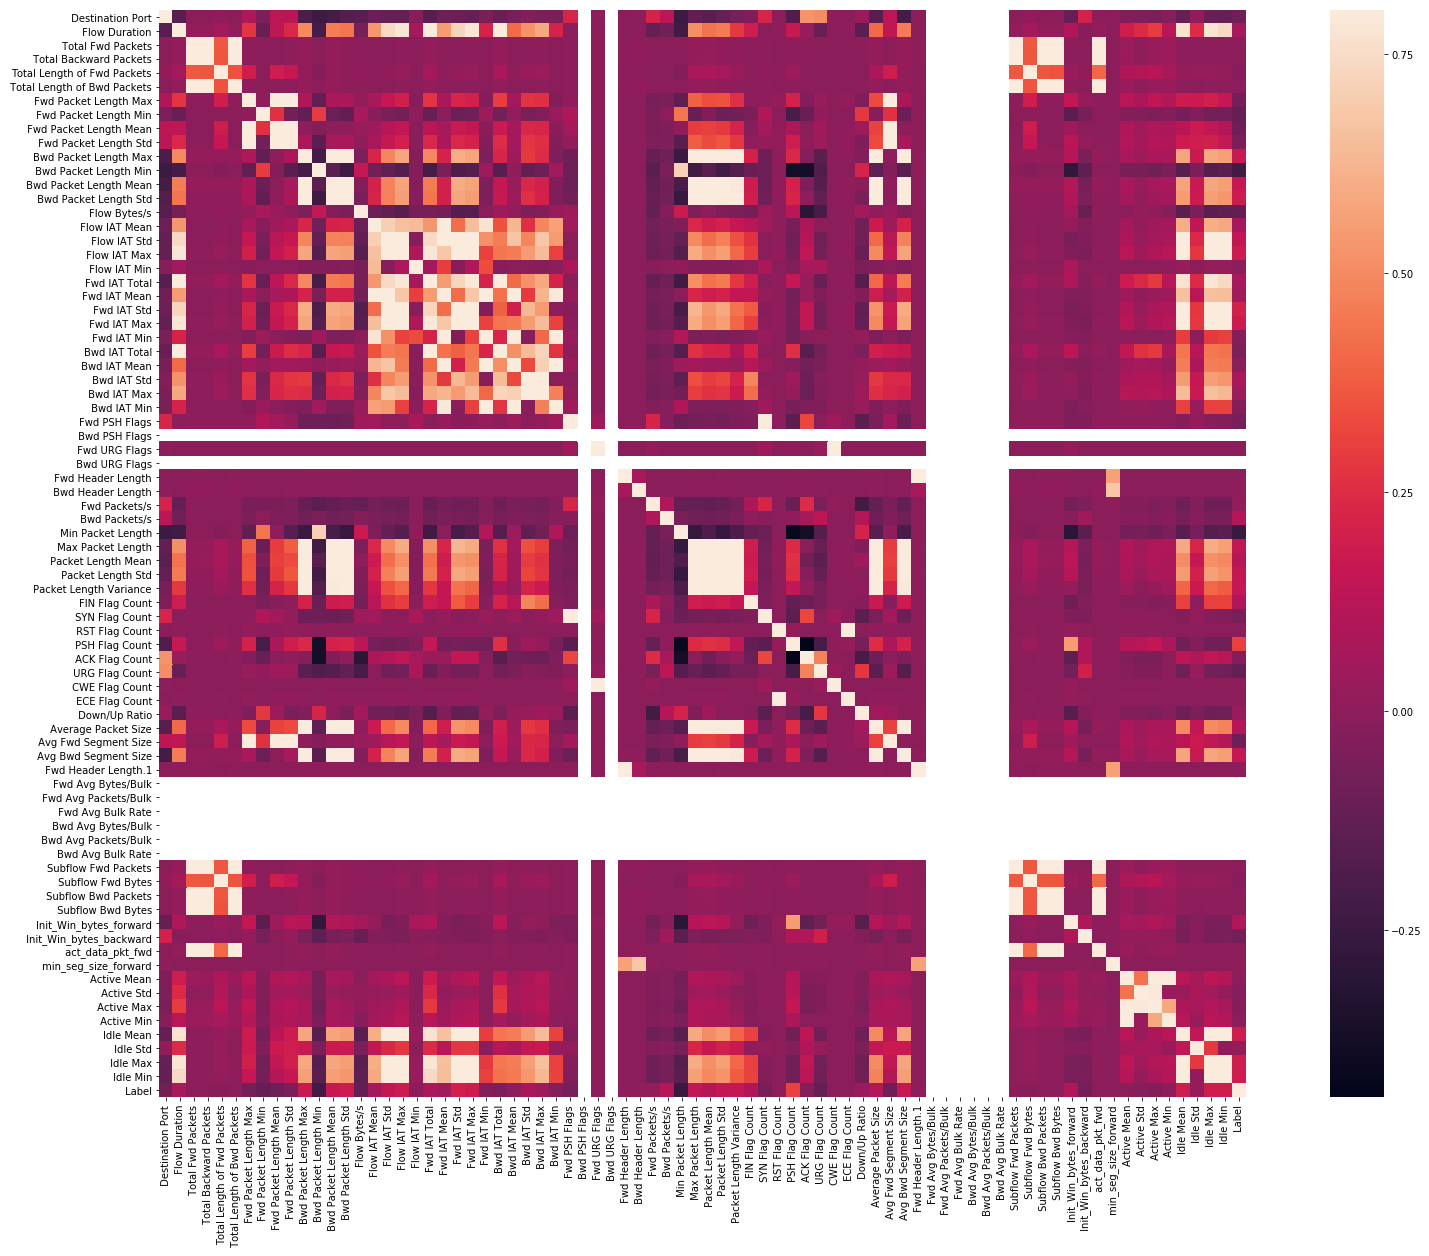

In [6]:
# Correlation matrix

corrmat = data.corr()
fig = plt.figure(figsize = (30, 20))
print(corrmat.shape)
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [13]:
#deleting unecessary columns and filterin the data

data = data.drop([' Destination Port', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Mean',' Fwd Packet Length Std',
       ' Bwd Packet Length Min', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Min','Fwd IAT Total', ' Fwd IAT Mean',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Fwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s',' Min Packet Length',
       ' SYN Flag Count', ' RST Flag Count',
       ' ACK Flag Count', ' URG Flag Count', ' CWE Flag Count',
       ' ECE Flag Count', ' Down/Up Ratio',
       ' Avg Fwd Segment Size',
       ' Fwd Header Length.1', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk',
       ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk',
       'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', ' Subflow Fwd Bytes',
       ' Subflow Bwd Packets', ' Subflow Bwd Bytes',
       ' Init_Win_bytes_backward', ' act_data_pkt_fwd',
       ' min_seg_size_forward', 'Active Mean', ' Active Std', ' Active Max',
       ' Active Min',' Idle Std'],axis=1)

In [14]:

data.iloc[4444,20] = np.NaN
print(data.shape)
print(data.iloc[4444,20])

(2830742, 26)
nan


In [15]:
#defining a function to check and remove null and nan values
def checknull(data):
    check_null = data.isnull().values.any()
    if check_null == True:
        null_values = data.isnull().T.any().T.sum()
        data = data.dropna(axis = 0, how ='any')
        print("Found " + str(null_values) + " null values and deleted")
    else:
        print("No null values found")
    print(type(data))
    return data

In [16]:
data = checknull(data)

Found 1 null values and deleted
<class 'pandas.core.frame.DataFrame'>


In [17]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2830741 entries, 2766657 to 2038494
Data columns (total 26 columns):
 Flow Duration             int64
 Fwd Packet Length Min     int64
Bwd Packet Length Max      int64
 Bwd Packet Length Mean    float64
 Bwd Packet Length Std     float64
 Flow IAT Mean             float64
 Flow IAT Std              float64
 Flow IAT Max              int64
 Fwd IAT Std               float64
 Fwd IAT Max               int64
 Bwd PSH Flags             int64
 Bwd URG Flags             int64
 Bwd Packets/s             float64
 Max Packet Length         int64
 Packet Length Mean        float64
 Packet Length Std         float64
 Packet Length Variance    float64
FIN Flag Count             int64
 PSH Flag Count            int64
 Average Packet Size       float64
 Avg Bwd Segment Size      float64
Init_Win_bytes_forward     int64
Idle Mean                  float64
 Idle Max                  int64
 Idle Min                  int64
 Label                     int64

In [18]:
print(data.columns)

Index([' Flow Duration', ' Fwd Packet Length Min', 'Bwd Packet Length Max',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', ' Flow IAT Mean',
       ' Flow IAT Std', ' Flow IAT Max', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Bwd PSH Flags', ' Bwd URG Flags', ' Bwd Packets/s',
       ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std',
       ' Packet Length Variance', 'FIN Flag Count', ' PSH Flag Count',
       ' Average Packet Size', ' Avg Bwd Segment Size',
       'Init_Win_bytes_forward', 'Idle Mean', ' Idle Max', ' Idle Min',
       ' Label'],
      dtype='object')


In [19]:
#randomlty shuffling the dataset

from sklearn.utils import shuffle
data = shuffle(data)
print("Data Randomly shuffled")

Data Randomly shuffled


In [20]:
# Get all the columns from the dataFrame
columns = data.columns.tolist()

# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in [" Label"]]

# Store the variable we'll be predicting on
target = " Label"

data1 = data[columns]
target1 = data[target]

# Print shapes
print(data1.shape)
print(target1.shape)
type(data)

(2830741, 25)
(2830741,)


pandas.core.frame.DataFrame

In [22]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(data1,target1, test_size = 0.20)

In [23]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)
d = xtest.iloc[65754]
d = d.reshape(1, -1)
print(d)

(2264592, 25)
(2264592,)
(566149, 25)
(566149,)
[[  1.57053000e+05   4.10000000e+01   9.50000000e+01   9.50000000e+01
    0.00000000e+00   2.24361429e+04   4.20397179e+04   1.08634000e+05
    9.05666273e+04   1.56869000e+05   0.00000000e+00   0.00000000e+00
    2.54691092e+01   9.50000000e+01   6.50000000e+01   2.84604989e+01
    8.10000000e+02   0.00000000e+00   0.00000000e+00   7.31250000e+01
    9.50000000e+01  -1.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]]


/Users/rehan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [24]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [25]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)
d = xtest.iloc[68534]
d = d.reshape(1, -1)
print(d)

(2264592, 25)
(2264592,)
(566149, 25)
(566149,)
[[  3.05920000e+04   5.60000000e+01   1.16000000e+02   1.16000000e+02
    0.00000000e+00   3.05920000e+04   0.00000000e+00   3.05920000e+04
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    3.26882845e+01   1.16000000e+02   7.60000000e+01   3.46410161e+01
    1.20000000e+03   0.00000000e+00   0.00000000e+00   1.14000000e+02
    1.16000000e+02  -1.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]]


/Users/rehan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [26]:
from sklearn.metrics import accuracy_score
pred = model.predict(xtest)
score = accuracy_score(pred,ytest)
print("Accuracy : " + str(score*100))


Accuracy : 99.824251213
Loss : 0.17574878698


In [27]:
print(le.inverse_transform(model.predict(d)))
print(model.predict(d))

['BENIGN']
[0]
